Start of evolution
  Evaluated 200 individuals
-- Generation 1 --
  Evaluated 158 individuals
  Min 394.0
  Max 647.0
  Avg 510.84
  Std 43.57722340856524
Best individual in Generation 1 [8, 7, 5, 6, 3, 9, 10, 4, 1, 2], (394.0,)
-- Generation 2 --
  Evaluated 134 individuals
  Min 384.0
  Max 596.0
  Avg 484.68
  Std 41.06966763926881
Best individual in Generation 2 [8, 9, 3, 2, 1, 4, 10, 7, 5, 6], (384.0,)
-- Generation 3 --
  Evaluated 136 individuals
  Min 374.0
  Max 625.0
  Avg 465.265
  Std 45.19385771318951
Best individual in Generation 3 [8, 5, 7, 4, 10, 6, 1, 2, 3, 9], (374.0,)
-- Generation 4 --
  Evaluated 152 individuals
  Min 334.0
  Max 580.0
  Avg 463.935
  Std 44.99867525827841
Best individual in Generation 4 [6, 8, 5, 7, 4, 10, 1, 2, 9, 3], (334.0,)
-- Generation 5 --
  Evaluated 128 individuals
  Min 343.0
  Max 571.0
  Avg 445.78
  Std 43.07715868067475
Best individual in Generation 5 [2, 1, 10, 3, 9, 6, 8, 5, 7, 4], (343.0,)
-- Generation 6 --
  Evaluated 144 indivi

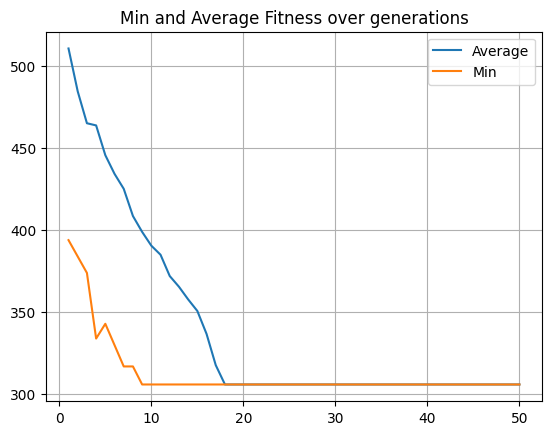

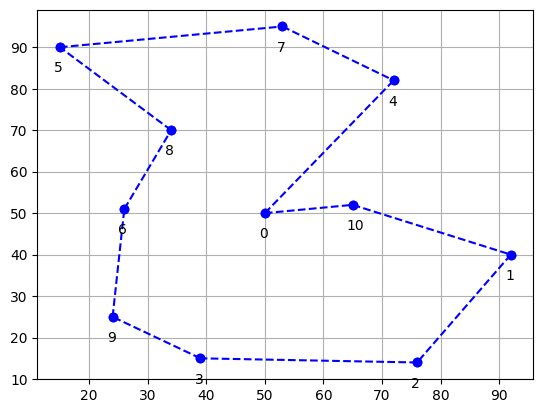

In [1]:
from cmath import inf
from turtle import title
from typing import Counter
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import random

import numpy as np
from math import sqrt, sin, copysign

from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

def front(self, n):
    return self.iloc[: , :n]

pd.DataFrame.front = front

no_cities = 10


df = pd.read_csv("CustDist_WHCentral.csv")
df_2 = pd.read_csv("CustOrd.csv")
df_3 = pd.read_csv("CustXY_WHCentral.csv")

df_dist = df.head(11)
df_dist = df_dist.front(12)               #For 10 cities

df_ord = df_2.head(11)                #For 10 cities
df_ord = df_ord.front(12)               #For 10 cities

df_xy = df_3.head(11)                #For 10 cities
df_xy = df_xy.front(12)               #For 10 cities


##Dataframe to np.arrays
dist = pd.DataFrame(df_dist).to_numpy()
dist = np.delete(dist,0,1)

order = pd.DataFrame(df_ord).to_numpy()
order = np.delete(order,0,1)

coord_xy = pd.DataFrame(df_xy).to_numpy()
coord_xy = np.delete(coord_xy,0,1)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

IND_SIZE = 10 # 

toolbox.register("indices",random.sample, range(0,IND_SIZE), IND_SIZE)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("mate", tools.cxOrdered)


def count_total_orders(order):
    sum_order = np.sum(order)
    return sum_order

def eval_Distances(individual):
    sum_distances = 0

    for i in range(0,no_cities):
        if(i == 0):
            sum_distances = dist[0][individual[0]+1]
        else:
            sum_distances = sum_distances+dist[individual[i-1]+1][individual[i]+1]

    sum_distances = sum_distances + dist[0][individual[no_cities-1]+1]
    return [sum_distances,]

toolbox.register("evaluate", eval_Distances)

def plot_values(best_ind_original):
    for cnt in range(10):
        index = best_ind_original[cnt]

        if(cnt == 0):
            x_values = [coord_xy[0][0], coord_xy[index][0]]
            y_values = [coord_xy[0][1], coord_xy[index][1]]
            prev_index = index
            plt.plot(x_values, y_values, 'bo', linestyle='--')
            plt.text(coord_xy[0][0]-1, coord_xy[0][1] - 6, '0')
            plt.text(coord_xy[index][0]-1, coord_xy[index][1] - 6, f'{index}')
        else:
            x_values = [coord_xy[prev_index][0], coord_xy[index][0]]
            y_values = [coord_xy[prev_index][1], coord_xy[index][1]]
            prev_index = index
            plt.plot(x_values, y_values, 'bo', linestyle='--')
            plt.text(coord_xy[index][0]-1, coord_xy[index][1] - 6, f'{index}')
        

        if(cnt == 9):
            x_values = [coord_xy[0][0], coord_xy[index][0]]
            y_values = [coord_xy[0][1], coord_xy[index][1]]
            plt.plot(x_values, y_values, 'bo', linestyle='--')

    plt.grid()
    plt.show()

def main():
    random.seed(64)
    pop = toolbox.population(n=200)

    CXPB, MUTPB = 0.70, 0.2
    
    print("Start of evolution")

    sum_order = count_total_orders(order)

    if(sum_order<1000):
        fitnesses = list(map(toolbox.evaluate, pop))
        for ind, fit in zip(pop, fitnesses):
            ind.fitness.values = fit

    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]


    # Variable keeping track of the number of generations
    g = 0

    std = inf

    arr_mean = []
    arr_min = []
    
    while g < 50 or std != 0:
        g = g + 1
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):

            # cross two individuals with probability CXPB
            if random.random() < CXPB:

                toolbox.mate(child1, child2)

                # fitness values of the children
                # must be recalculated later
                del child1.fitness.values
                del child2.fitness.values

    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        print("  Evaluated %i individuals" % len(invalid_ind))
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)


        best_ind = tools.selBest(pop, 1)[0]
        best_ind_original = [x+1 for x in best_ind]

        print("Best individual in Generation %d %s, %s" % (g, best_ind_original, best_ind.fitness.values))

        arr_mean.append(mean)
        arr_min.append(min(fits))

    x_coordinate = [i+1 for i in range(len(arr_mean))]
    plt.plot(x_coordinate, arr_mean, label = "Average")
    plt.plot(x_coordinate, arr_min, label = "Min")
    plt.title("Min and Average Fitness over generations")
    plt.legend()
    plt.grid()
    plt.figure()
    plot_values(best_ind_original)



if __name__ == "__main__":
    main()